# Pymaceuticals Inc.
---

### Analysis

- A generated pie plot shows an almost equal distribution of female versus male mice  51% - male, 49% - female.
- A boxplot was created for drugs "Capomulin", "Ramicane", "Infubinol", "Ceftamin". Only Infubinol has an outlier. "Capomulin" and "Ramicane" were more effective, their boxes are loacted lower than the boxes of "Infubinol", "Ceftamin.  
- A line plot "Capomulin treatmnet of mouse I509" shows that the drug has positive effect on a mouse over the time period. A tumor volume decreased. 
- The correlation between mouse weight and the average tumor volume for the "Capomulin" regimen is 0.84.

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [54]:
# Checking the number of mice.
number_mice=merged_df["Mouse ID"].nunique()
number_mice

249

In [55]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [56]:
# Optional: Get all the data for the duplicate mouse ID. 
data_duplicated_mice = merged_df.loc[merged_df["Mouse ID"] == "g989", :]
data_duplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [57]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
g989_index = data_duplicated_mice.index
g989_index


Int64Index([908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920], dtype='int64')

In [58]:
cleaned = merged_df.drop(g989_index)
cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [59]:
# Checking the number of mice in the clean DataFrame.
number_mice_cleaned=cleaned["Mouse ID"].nunique()
number_mice_cleaned

248

## Summary Statistics

In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_dr = cleaned.groupby(["Drug Regimen"]) 
mean_tv = grouped_dr['Tumor Volume (mm3)'].mean()
median_tv = grouped_dr['Tumor Volume (mm3)'].median()
variance_tv = grouped_dr['Tumor Volume (mm3)'].var()
stdv_tv = grouped_dr['Tumor Volume (mm3)'].std()
sem_tv = grouped_dr['Tumor Volume (mm3)'].sem()
#The sem() method calculates the standard error of the mean for each column.
#grouped_dr.head()


summary_df = pd.DataFrame({
    "Tumor Volume Mean (mm3)": mean_tv,
    "Tumor Volume Median (mm3)": median_tv,
    "Tumor Volume Variance (mm3)": variance_tv,
    "Tumor Volume Standard Deviation": stdv_tv,
    "Tumor Volume SEM": sem_tv 
})

summary_df


,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Variance (mm3),Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg_df = cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

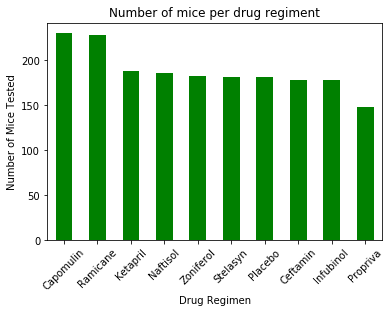

In [62]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bp_mice = cleaned["Drug Regimen"].value_counts()
bp_mice.plot(kind="bar", color = 'g', align="center", rot=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of mice per drug regiment")
plt.show()

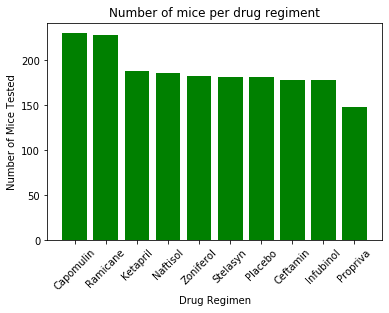

In [63]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x = bp_mice.index
y = bp_mice.values
plt.bar(x, y, color="g")
plt.xticks(rotation=45)


# Give the chart a title, x label, and y label
plt.title("Number of mice per drug regiment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

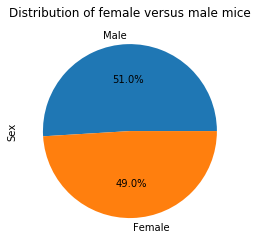

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pp = cleaned["Sex"].value_counts()
plt.title("Distribution of female versus male mice")
gender_pp.plot(kind = "pie", autopct= "%1.1f%%")
plt.show()


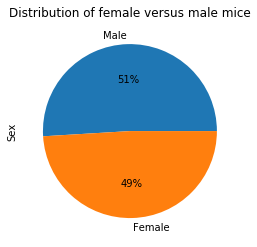

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_pp.index
plt.pie(x=gender_pp, labels=labels, autopct="%1.0f%%")
plt.ylabel(gender_pp.name)
plt.title("Distribution of female versus male mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [66]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse

max_timepoint_df = cleaned.groupby('Mouse ID').max()[["Timepoint"]].reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


merged_timepoint_df = pd.merge(max_timepoint_df, cleaned, how = 'left', on = ["Mouse ID", "Timepoint"])
merged_timepoint_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [67]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drugs_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    tumor_data = merged_timepoint_df.loc[merged_timepoint_df["Drug Regimen"]== drug, "Tumor Volume (mm3)"]
    # add subset 
    
    tumor_vol_list.append(tumor_data)
    # Determine outliers using upper and lower bounds
    Q1 = tumor_data.quantile(0.25)
    Q3 = tumor_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 -(1.5 *IQR)
    upper_bound = Q3 + (1.5*IQR)
    outliers = tumor_data.loc[(tumor_data < lower_bound) | (tumor_data > upper_bound)]
    print(drug, outliers)

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


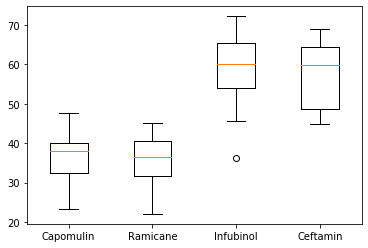

In [68]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_list, labels = drugs_list)
plt.show()

## Line and Scatter Plots

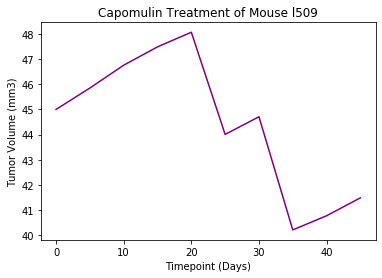

In [86]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#mouse id = l509

mouse_l509 = cleaned.loc[cleaned["Mouse ID"]== "l509"]
#mouse_l509

plt.plot(mouse_l509["Timepoint"], mouse_l509["Tumor Volume (mm3)"], color="purple")
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()


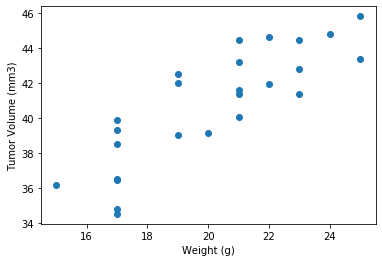

In [103]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin=cleaned.loc[cleaned["Drug Regimen"]=="Capomulin"]

avg_capomulin = capomulin.groupby("Mouse ID")[["Tumor Volume (mm3)","Weight (g)"]].mean()
tumor_volume = avg_capomulin["Tumor Volume (mm3)"]
mouse_weight = avg_capomulin["Weight (g)"]
plt.scatter(mouse_weight,tumor_volume, )
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


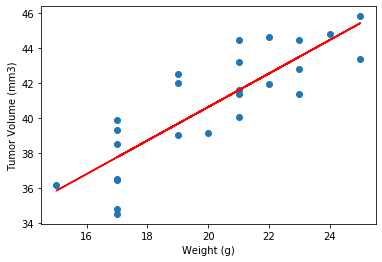

In [104]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x = mouse_weight
y= tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)

print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")
regression = slope*(mouse_weight)+ intercept

plt.scatter(mouse_weight, tumor_volume)
plt.plot(mouse_weight, regression, color = "red")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()